In [1]:
import datetime as dt
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

In [35]:
data=web.DataReader("tsla","yahoo")

In [36]:
data.iloc[100:]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-03-21,21.496000,20.679333,20.683332,21.101999,89376000.0,21.101999
2018-03-22,21.254667,20.545334,20.926001,20.606667,74097000.0,20.606667
2018-03-23,20.750000,20.030001,20.750000,20.102667,99823500.0,20.102667
2018-03-26,20.506001,19.424000,20.489332,20.278667,125628000.0,20.278667
2018-03-27,20.284666,18.478666,20.266666,18.612000,208080000.0,18.612000
...,...,...,...,...,...,...
2022-10-18,229.820007,217.250000,229.500000,220.190002,75891900.0,220.190002
2022-10-19,222.929993,217.779999,219.800003,222.039993,66571500.0,222.039993
2022-10-20,215.550003,202.000000,208.279999,207.279999,117798100.0,207.279999


In [37]:
data['SMA_100']=ta.SMA(data['Close'],365)

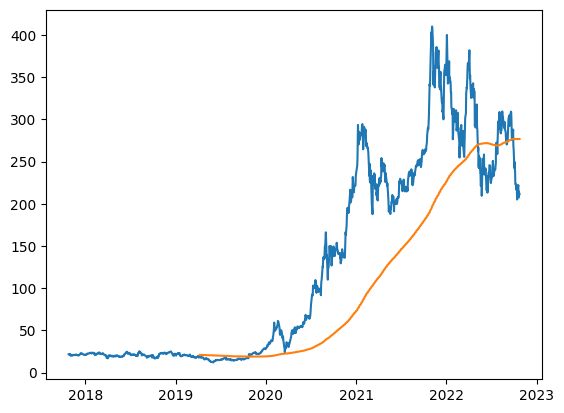

In [39]:
plt.plot(data['Close'])
plt.plot(data['SMA_100'])

In [40]:
data['EMA_100']=ta.EMA(data['Close'],365)

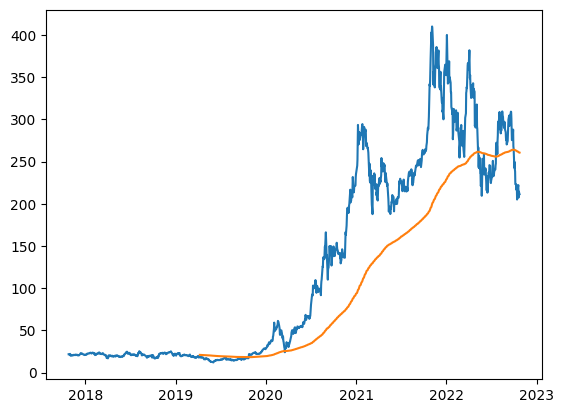

In [41]:
plt.plot(data['Close'])
plt.plot(data['EMA_100'])

In [45]:

data['LINEARREG']=ta.LINEARREG(data['Close'],200)


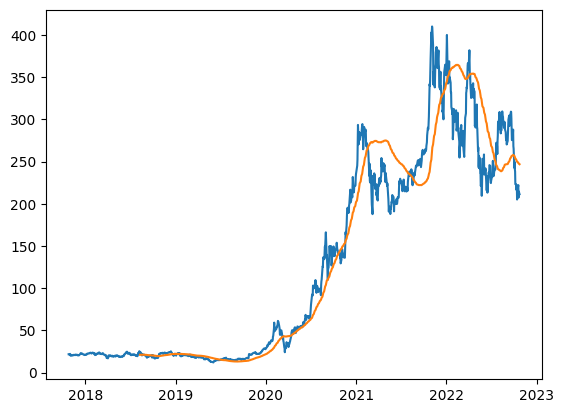

In [46]:
plt.plot(data['Close'])
plt.plot(data['LINEARREG'])

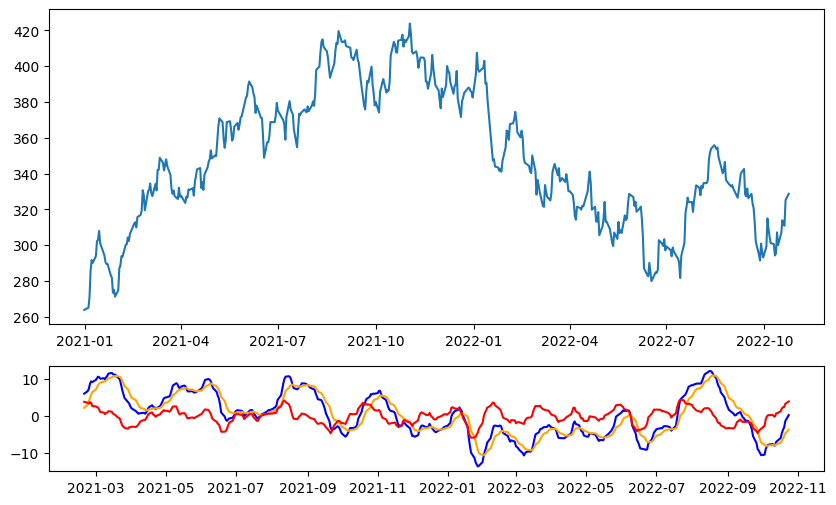

In [70]:
from calendar import c


start=dt.datetime(2021,1,1)
end=dt.datetime.now()
data=web.DataReader("GS","yahoo",start,end)
macd, macd_signal,macd_hist=ta.MACD(data['Close'])


fig,axs= plt.subplots (2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10,6))

axs[0].plot(data['Close'])
axs[1].plot(macd , 'b-') 
axs[1].plot(macd_signal,'',color='orange')
axs[1].plot(macd_hist.index, macd_hist,color='red')

In [78]:
start=dt.datetime(2022,3,1)
end=dt.datetime.now()

data=web.DataReader("msft","yahoo",start,end)

In [79]:
data['ENGULFING']=ta.CDLENGULFING(data['Open'],data['High'],data['Low'],data['Close'])

In [80]:
data

,High,Low,Open,Close,Volume,Adj Close,ENGULFING
Date,,,,,,,
2022-02-28,299.140015,293.000000,294.309998,298.790009,34627500.0,297.464294,0
2022-03-01,299.970001,292.149994,296.399994,294.950012,31217800.0,293.641357,0
2022-03-02,301.470001,293.700012,295.359985,300.190002,31873000.0,298.858093,0
2022-03-03,303.130005,294.049988,302.890015,295.920013,27314500.0,294.607056,0
2022-03-04,295.660004,287.170013,294.290009,289.859985,32356500.0,288.573914,0
...,...,...,...,...,...,...,...
2022-10-18,243.929993,235.369995,243.240005,238.500000,26329600.0,238.500000,0
2022-10-19,239.610001,234.289993,237.039993,236.479996,19985700.0,236.479996,0
2022-10-20,241.309998,234.869995,235.770004,236.149994,21811000.0,236.149994,0


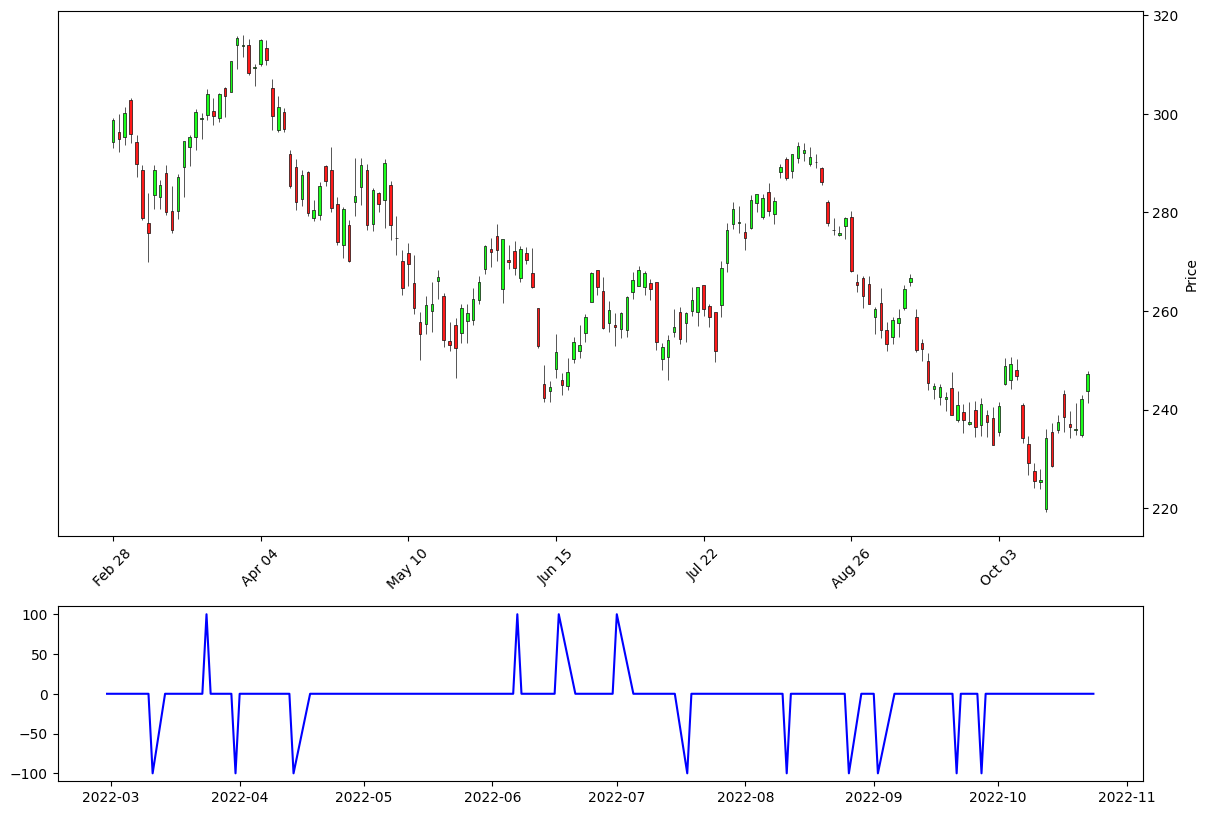

In [87]:
from turtle import color
import mplfinance as mpf

fig,axs= plt.subplots (2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(14,10))

colors=mpf.make_marketcolors(up="#00ff00",
 down="#ff0000")
mpf_style = mpf.make_mpf_style(base_mpf_style="yahoo", marketcolors=colors)

mpf.plot(data, type="candle", ax=axs[0], style=mpf_style)
axs[1].plot(data['ENGULFING'], color="blue")